In [1]:
import importlib
import matplotlib.pyplot as plt
import numpy as np
import sys
sys.path.append('../../')

from astroLuSt.synthetics import random as alsyra
from astroLuSt.preprocessing import timeseries as alprti
from astroLuSt.styles import plot_styles as alstps

importlib.reload(alsyra)
importlib.reload(alprti)
importlib.reload(alstps)

#style for plotting
_ = alstps.tre_light()

# Periodic Signals

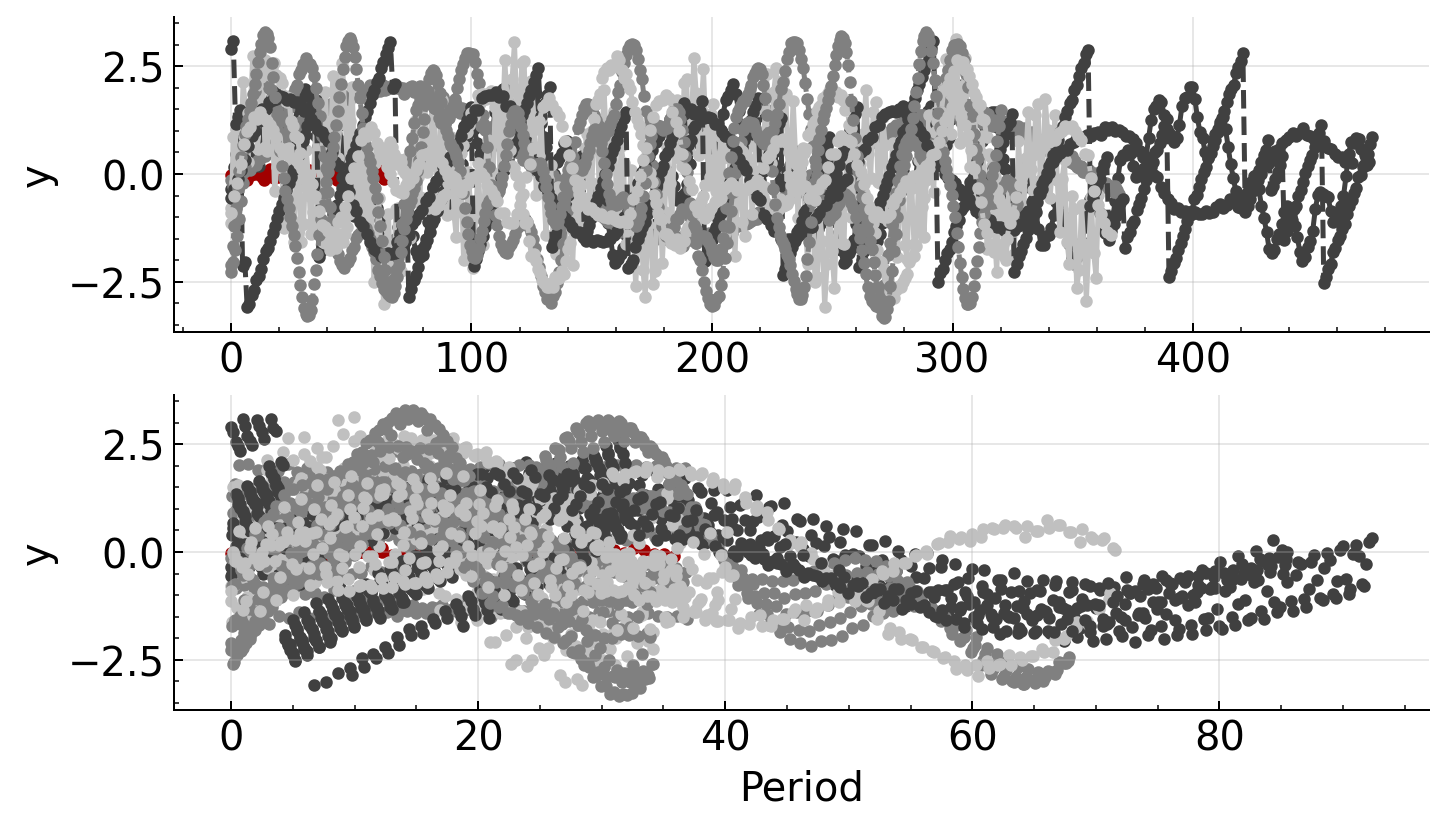

In [2]:
importlib.reload(alsyra)
nsamples = 10
ncomposites = 3

GPS = alsyra.GeneratePeriodicSignals(
    npoints=np.random.randint(256,512,nsamples),
    periods=np.random.uniform(0.05, 100, size=(nsamples,ncomposites)),
    amplitudes=np.sort(np.random.uniform(0.05, 2,size=(nsamples,ncomposites)), axis=1)[:,::-1],
    x_min=0, x_max=np.random.uniform(300,500,nsamples),
    noise_level_x=np.random.uniform(1e-3,1e-2, size=nsamples), noise_level_y=np.random.uniform(1e-2,1e-1, size=nsamples),
    x_offsets=np.random.uniform(0,7,size=(nsamples,ncomposites)),
    choices=None,
    verbose=3,
)

#work with custom generator functions
GPS.choices = np.array([
    GPS.sine_,
    GPS.cosine_,
    GPS.tangent_,
    GPS.sawtooth_,
    GPS.polynomial_,
    GPS.random_,
    lambda x, **kwargs: np.sin(x),  #custom function (takes `x` and `**kwargs`)
    np.zeros(shape=80),             #custom array (will be returned unmodified except padded with `np.nan` at the end)
], dtype=object)

# print(GPS)
#make sure every sample has unique reandom hyperparameters
func_kwargs = [dict(
        p=np.random.randn(6),   #polynomial coefficients
        amp=np.random.uniform(0.1,5), loc=np.random.uniform(-1,1), scale=np.random.uniform(0.1,1),
        init_res=50
    ) for _ in range(nsamples)]

x, y = GPS.rvs(
    func_kwargs=func_kwargs,
    choices_kwargs=dict(p=[0.5,0.05,0.0,0.2,0.05,0.05,0.05,0.1]),
    # choices_kwargs=dict(p=[0,0,0,0,0,0,1,0]),
)

fig, axs= GPS.plot_result(x, y, GPS.periods)

# Unique Strings

In [3]:
GUS = alsyra.GenUniqueStrings(n=5, char_choices=None, prefix="pre_", suffix="_post")
strings = GUS.rvs(10)
print(strings)

['pre_6BFG8_post' 'pre_AZA00_post' 'pre_3ZFG9_post' 'pre_UP3DF_post'
 'pre_AZ83D_post' 'pre_J14IY_post' 'pre_X21YN_post' 'pre_U083E_post'
 'pre_3AKNL_post' 'pre_8R1AS_post']


# Randomly Reperiodized Signals

(10, 200) (10, 200)


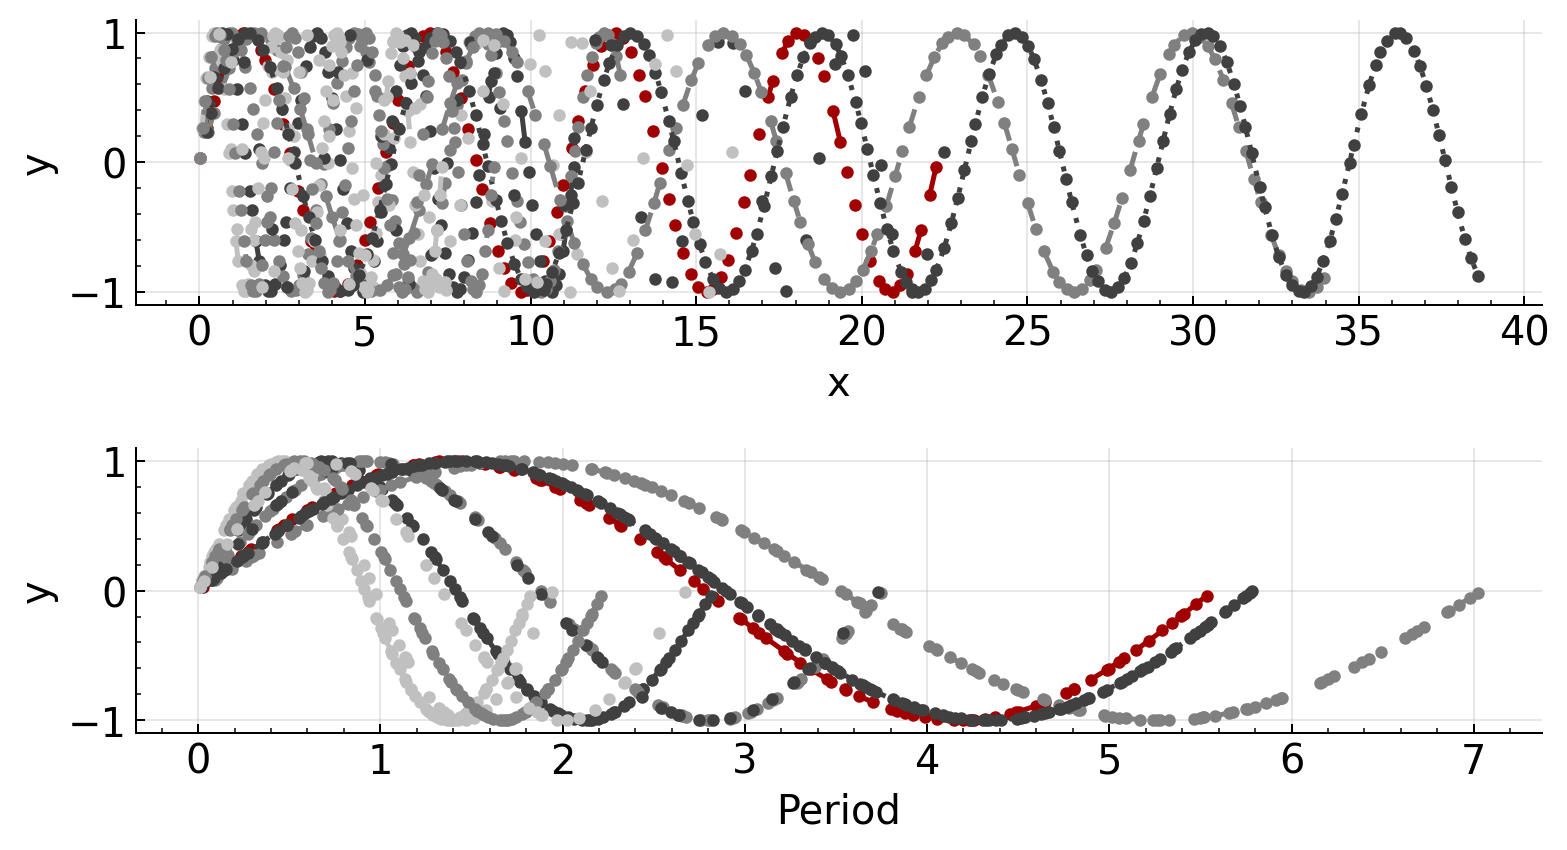

In [4]:
importlib.reload(alsyra)
importlib.reload(alprti)

p = np.array([.5,2,3])
p_new = np.random.uniform(1, 8, 1000)
x_min = 0
x_max = np.random.uniform(10,60,100)

GVR = alsyra.GenerateViaReperiodizing(
    periods=p_new,
    x_min=x_min, x_max=x_max,
    verbose=0
)

# print(GVR)

# p = np.array([1,2,3])
x = [
    np.linspace(0,3,50)  +0.01*np.random.randn(50),
    np.linspace(0,8,100) +0.01*np.random.randn(100),
    np.linspace(0,20,200)+0.01*np.random.randn(200),
]
y = [np.sin(xi*2*np.pi/pi)+0.0*np.random.randn(xi.shape[0]) for xi, pi in zip(x, p)]

# fig, axs = GVR.plot_result(x, y, p)


x_gen, y_gen, p_gen = GVR.rvs(
    x, y, periods_old=p,
    size=10,
)

#padding to have equal shapes
P2S = alprti.Pad2Size(
    size=200,
    verbose=0,
)
x_gen_pad = P2S.fit_transform(x_gen, transform_kwargs=dict(pad_kwargs={'mode':'linear_ramp'}))
y_gen_pad = P2S.fit_transform(y_gen, transform_kwargs=dict(pad_kwargs={'constant_values':np.nan}))

print(x_gen_pad.shape, y_gen_pad.shape)

fig, axs = GVR.plot_result(x_gen_pad, y_gen_pad, p_gen)
fig.tight_layout()